Created on Wed Mar 27 16:50 2019

timeseries of different observational datasets (SICCI2, Bootstrap, NASA Team)

@author: Clara Burgard

In [5]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set_context('paper')

READ IN DATA

In [7]:
inputpath = '/work/mh0033/m300411/SatSim/WORK_DATA/observations/'
plot_path = '/work/mh0033/m300411/SatSim/PLOTS/'

In [8]:
data = pd.read_table(inputpath+'EUMETSAT-OSISAF_OSI-450__ESA-CCI_SICCI-25km__ICDC__SeaIceAreaandExtentTimeseries__nh_fv0.03.txt',delimiter=',')

In [11]:
SIA_temp = np.load(inputpath+'SIA_observations_nh.npy',allow_pickle=True)

def read_sia(key):
    sia = pd.DataFrame(index=range(1850,2020))
    for i in range(1,13):
        sia[i] = SIA_temp[key][str(i).zfill(2)]
    return sia

NSIDC_nt = read_sia('NSIDC_nt')
NSIDC_bt = read_sia('NSIDC_bt')

ORGANIZING THE DATA OF INTEREST (SICCI2, BT, NT)

In [12]:
data['time'] = pd.to_datetime(data.year*10000+data.month*100+1,format='%Y%m%d')

In [13]:
data = data.set_index('time')

In [15]:
time = []
NT = np.zeros(len(data.index))
BT = np.zeros(len(data.index))

n = 0
for yy in range(1979,2018):
    for mm in range (1,13):
        if (yy == 2017 and mm < 5):
            #print(yy,mm) 
            time[n] = time.append(pd.to_datetime(yy*10000+mm*100+1,format='%Y%m%d'))
            NT[n] = NSIDC_nt[mm].loc[yy]
            BT[n] = NSIDC_bt[mm].loc[yy]
            n = n+1
        elif yy < 2017:
            #print(yy,mm) 
            time[n] = time.append(pd.to_datetime(yy*10000+mm*100+1,format='%Y%m%d'))
            NT[n] = NSIDC_nt[mm].loc[yy]
            BT[n] = NSIDC_bt[mm].loc[yy]
            n = n+1

In [16]:
data['NT'] = NT
data['BT'] = BT

PLOT FIGURE 7

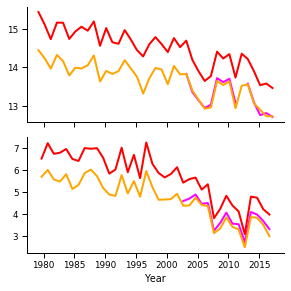

In [22]:
lw=2

f, axarr = plt.subplots(2, sharex=True,figsize=(8.27/2,8.27/2))
axarr[0].plot(data.index[data.index.month==3],data['SICCI-25kmSIA[km²]'][data.index.month==3]/10**6,color='magenta',label='SICCI',linewidth=2)
axarr[0].plot(data.index[data.index.month==3],data['BT'][data.index.month==3]/10**6,label='Bootstrap',color='red',linewidth=2)
axarr[0].plot(data.index[data.index.month==3],data['NT'][data.index.month==3]/10**6,label='NASA Team',color='orange',linewidth=2)
axarr[1].plot(data.index[data.index.month==9],data['SICCI-25kmSIA[km²]'][data.index.month==9]/10**6,color='magenta',label='SICCI',linewidth=2)
axarr[1].plot(data.index[data.index.month==9],data['BT'][data.index.month==9]/10**6,label='Bootstrap',color='red',linewidth=2)
axarr[1].plot(data.index[data.index.month==9],data['NT'][data.index.month==9]/10**6,label='NASA Team',color='orange',linewidth=2)
axarr[1].set_xlabel('Year')
#axarr[0].set_ylabel('March sea-ice area [x 10$^6$ km$^2$]')
#axarr[1].set_ylabel('September sea-ice area [x 10$^6$ km$^2$]')
sns.despine()
plt.tight_layout()
f.savefig(plot_path+'Figure7.pdf',dpi=250,bbox_inches='tight')
